# Load modules

In [1]:
import re
import datetime
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['font.size'] = 12

import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Set custom layout for plotly
pio.renderers.default = 'jupyterlab'
pio.templates['custom'] = go.layout.Template(
    layout= dict(
        font=dict(family='Courier New', size=15),
        title=dict(
            font=dict(family='Courier New', size=25),
            x=0.5
        ),
        bargap=0.1,
        width=900,
        height=500,
        autosize=False
    )
)
pio.templates.default = 'plotly+custom'

import seaborn as sns
sns.set_theme()

# Download data

In [2]:
sheet_id = '1o5swYSQd-O8vEALwvT20Jeivaf8AMCrEwJW16GqZlY8'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv'
df = pd.read_csv(url)
df

,"Количество больничных дней,""Возраст"",""Пол""",Количество больничных дней,"""Возраст""","""Пол"""
0,"5,39,""Ж""",5,39,"""Ж"""
1,"4,54,""М""",4,54,"""М"""
2,"4,26,""М""",4,26,"""М"""
3,"5,42,""М""",5,42,"""М"""
4,"4,29,""М""",4,29,"""М"""
...,...,...,...,...
232,"5,30,""М""",5,30,"""М"""
233,"4,36,""Ж""",4,36,"""Ж"""
234,"2,60,""Ж""",2,60,"""Ж"""
235,"2,44,""Ж""",2,44,"""Ж"""


# Prepare dataset

In [3]:
df.drop(columns=df.columns[0], axis=1, inplace=True)
df.columns = df.columns.str.strip('"')
df['Пол'] = df['Пол'].str.strip('"')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Количество больничных дней  237 non-null    int64 
 1   Возраст                     237 non-null    int64 
 2   Пол                         237 non-null    object
dtypes: int64(2), object(1)
memory usage: 5.7+ KB


In [5]:
df['Пол'].value_counts(dropna=False)

М    139
Ж     98
Name: Пол, dtype: int64

In [6]:
df

,Количество больничных дней,Возраст,Пол
0,5,39,Ж
1,4,54,М
2,4,26,М
3,5,42,М
4,4,29,М
...,...,...,...
232,5,30,М
233,4,36,Ж
234,2,60,Ж
235,2,44,Ж


В данных нет пропусков

# EDA

## Features

### `Количество больничных дней`

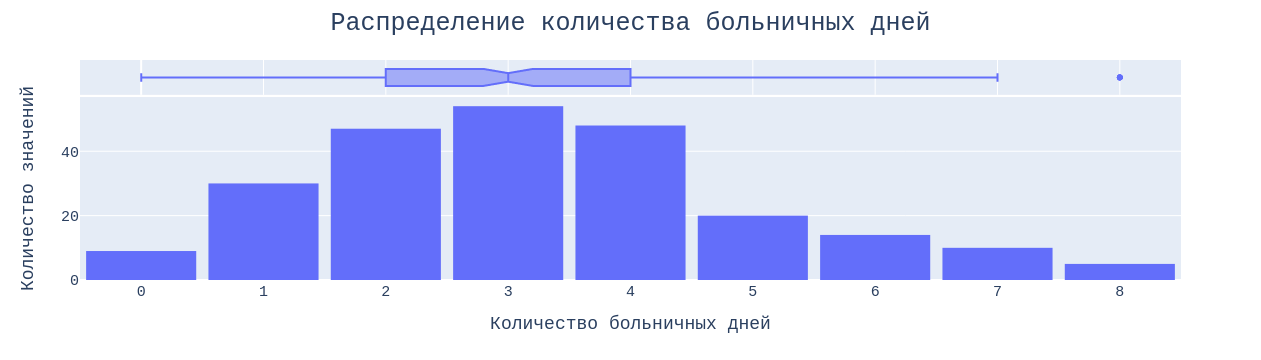

In [7]:
fig = px.histogram(df, x='Количество больничных дней',  marginal='box')

fig.update_layout(
    title='Распределение количества больничных дней',
    yaxis_title='Количество значений',
)
fig.show()

Распределение напоминает нормальное, скошенное вправо

In [8]:
df['Количество больничных дней'].describe()

count    237.000000
mean       3.257384
std        1.807821
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        8.000000
Name: Количество больничных дней, dtype: float64

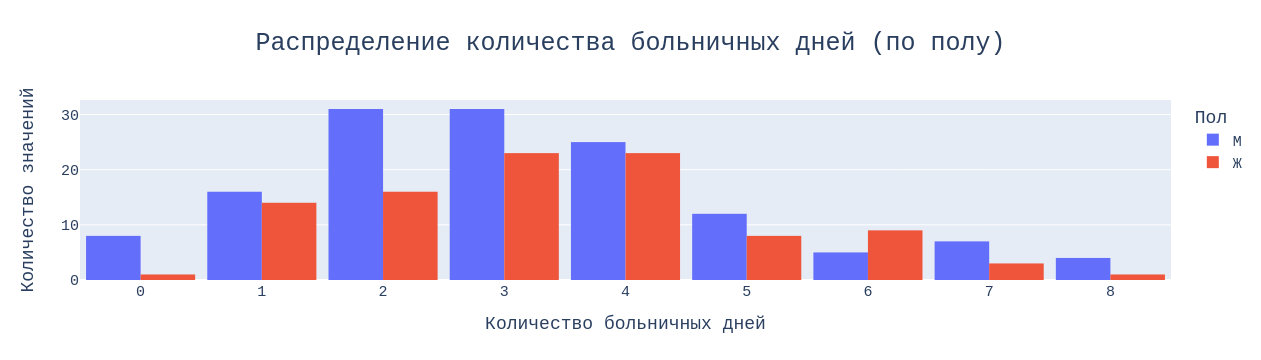

In [9]:
fig = go.Figure()

fig.add_trace(
    go.Histogram(
        x=df.loc[df['Пол'] == 'М','Количество больничных дней'],
        name='М'
    ),
)

fig.add_trace(
    go.Histogram(
        x=df.loc[df['Пол'] == 'Ж','Количество больничных дней'],
        name='Ж'
    ),
)

fig.update_layout(
    title_text='Распределение количества больничных дней (по полу)',
    yaxis_title='Количество значений',
    xaxis_title='Количество больничных дней',
    legend_title_text='Пол',
)
fig.show()

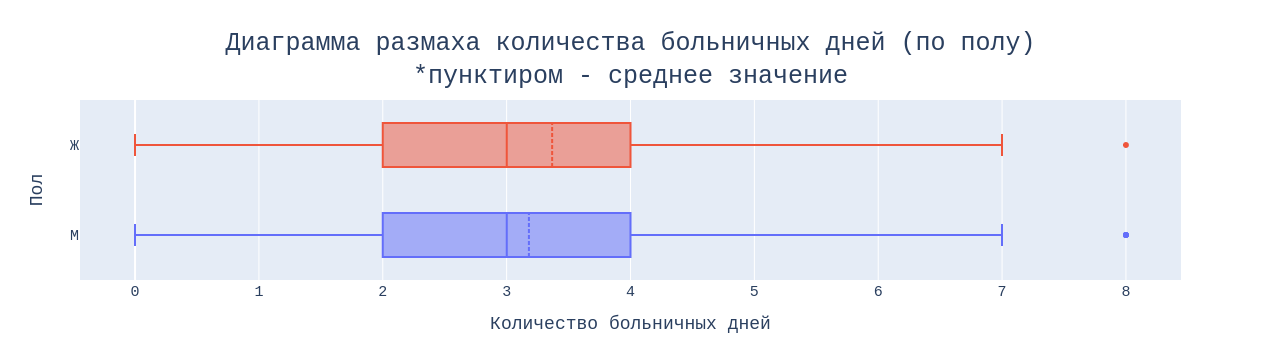

In [10]:
fig = go.Figure()

fig.add_trace(
    go.Box(
        x=df.loc[df['Пол'] == 'М','Количество больничных дней'],
        boxmean=True,
        name='М',
        showlegend=False
    ),
)

fig.add_trace(
    go.Box(
        x=df.loc[df['Пол'] == 'Ж','Количество больничных дней'],
        boxmean=True,
        name='Ж',
        showlegend=False
    ),
)

fig.update_layout(
    title_text='Диаграмма размаха количества больничных дней (по полу)<br>*пунктиром - среднее значение',
    yaxis_title='Пол',
    xaxis_title='Количество больничных дней',
)

Построим qq-plot

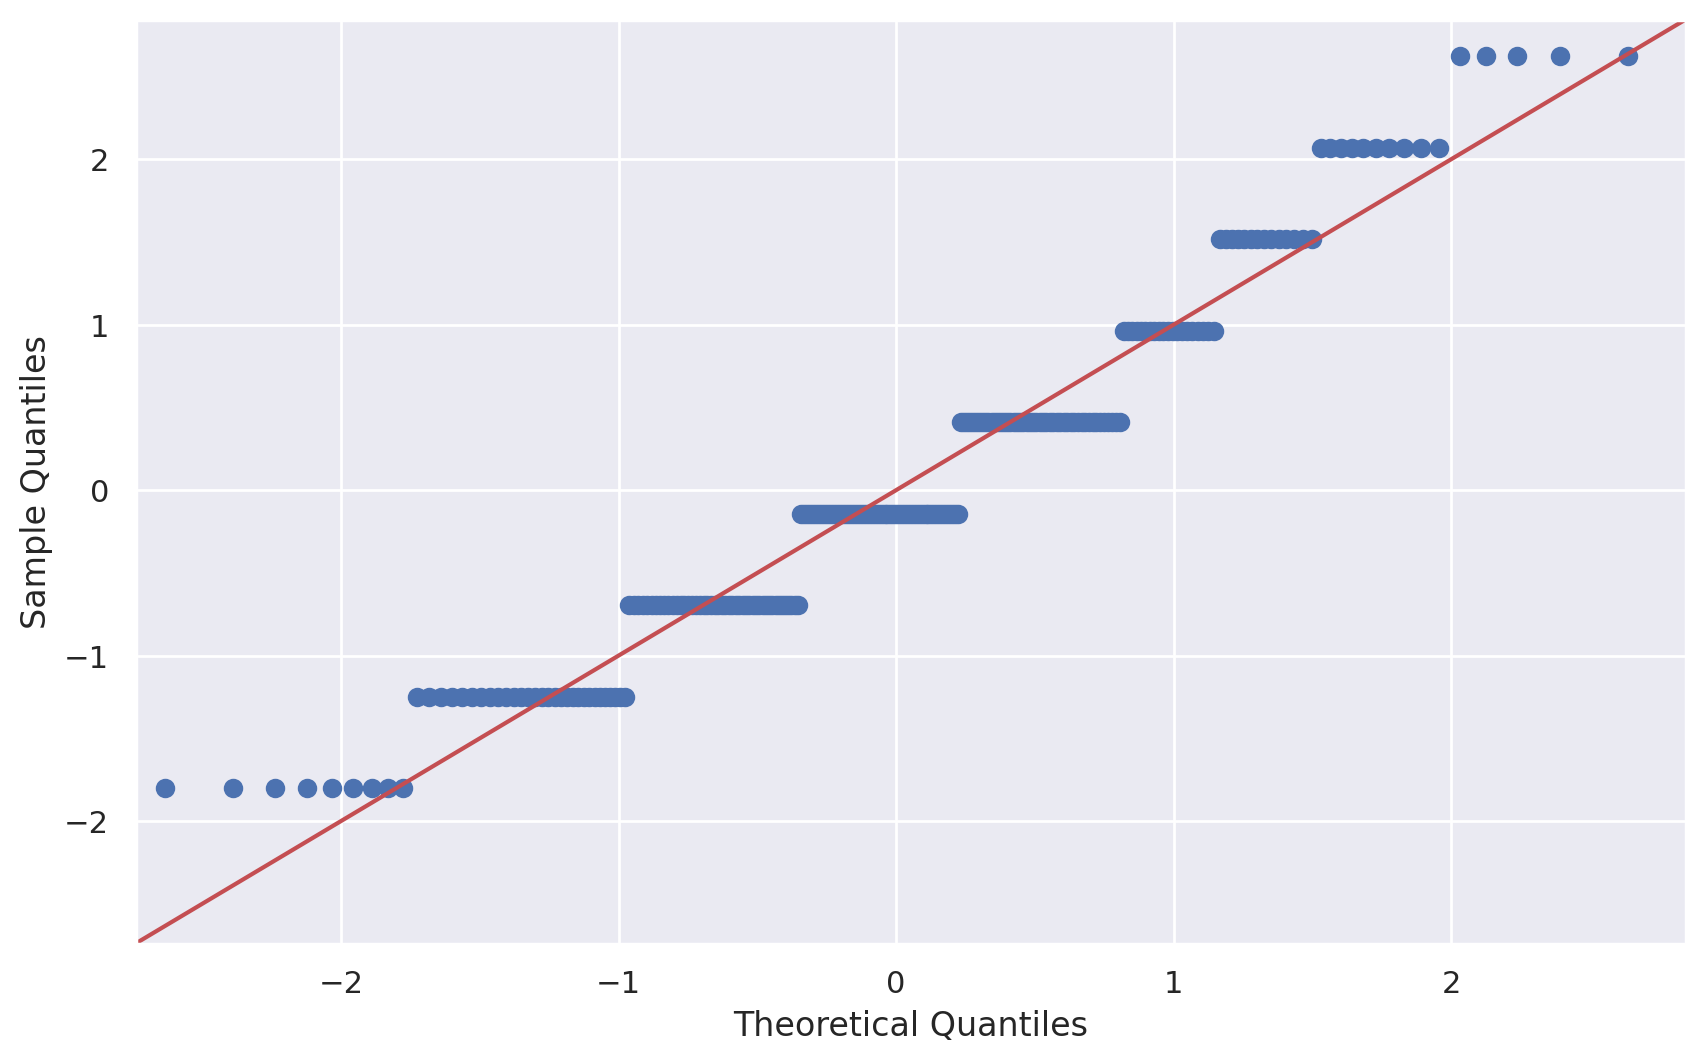

In [11]:
from statsmodels.api import qqplot


ill_day = df['Количество больничных дней']
ill_day = (ill_day - ill_day.mean()) / ill_day.std()

fig = qqplot(ill_day, line='45')
plt.show()

### `Возраст`

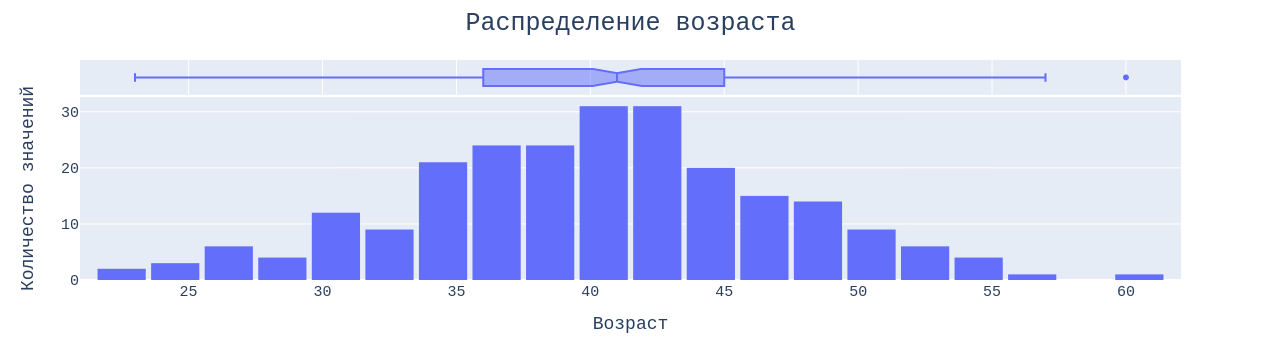

In [12]:
fig = px.histogram(df, x='Возраст', marginal='box')

fig.update_layout(
    title='Распределение возраста',
    yaxis_title='Количество значений',
    xaxis_title='Возраст'
)
fig.show()

Как ни странно, распределение возраста также напоминает нормальное

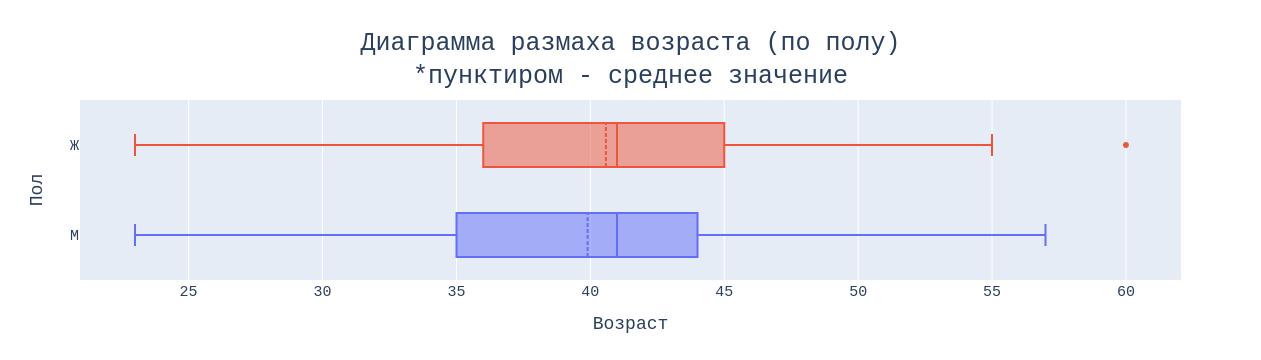

In [13]:
fig = go.Figure()

fig.add_trace(
    go.Box(
        x=df.loc[df['Пол'] == 'М','Возраст'],
        boxmean=True,
        name='М',
        showlegend=False
    ),
)

fig.add_trace(
    go.Box(
        x=df.loc[df['Пол'] == 'Ж','Возраст'],
        boxmean=True,
        name='Ж',
        showlegend=False
    ),
)

fig.update_layout(
    title_text='Диаграмма размаха возраста (по полу)<br>*пунктиром - среднее значение',
    yaxis_title='Пол',
    xaxis_title='Возраст',
)
fig.show()

### `Пол`

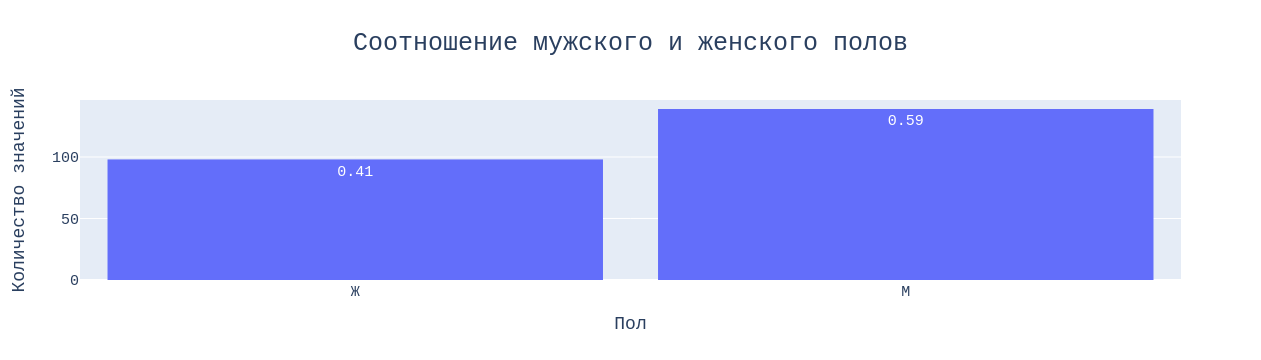

In [14]:
percentages_sex = df['Пол'].value_counts(normalize=True, ascending=True)

fig = go.Figure(
    go.Histogram(
        x=df['Пол'],
        text=percentages_sex,
        texttemplate='%{text:.2f}',
        hovertemplate='Количество: %{y}<br>Отношение к общему количеству: %{text:.2f}',
    ),
)

fig.update_layout(
    title_text='Соотношение мужского и женского полов',
    xaxis_title='Пол',
    yaxis_title='Количество значений'
)
fig.show()

# Model

## Мужчины пропускают в течение года более 2 рабочих дней (work_days) по болезни значимо чаще женщин.

In [15]:
df['work_days_>_2'] = df['Количество больничных дней'].apply(lambda x: 'Да' if x > 2 else 'Нет')

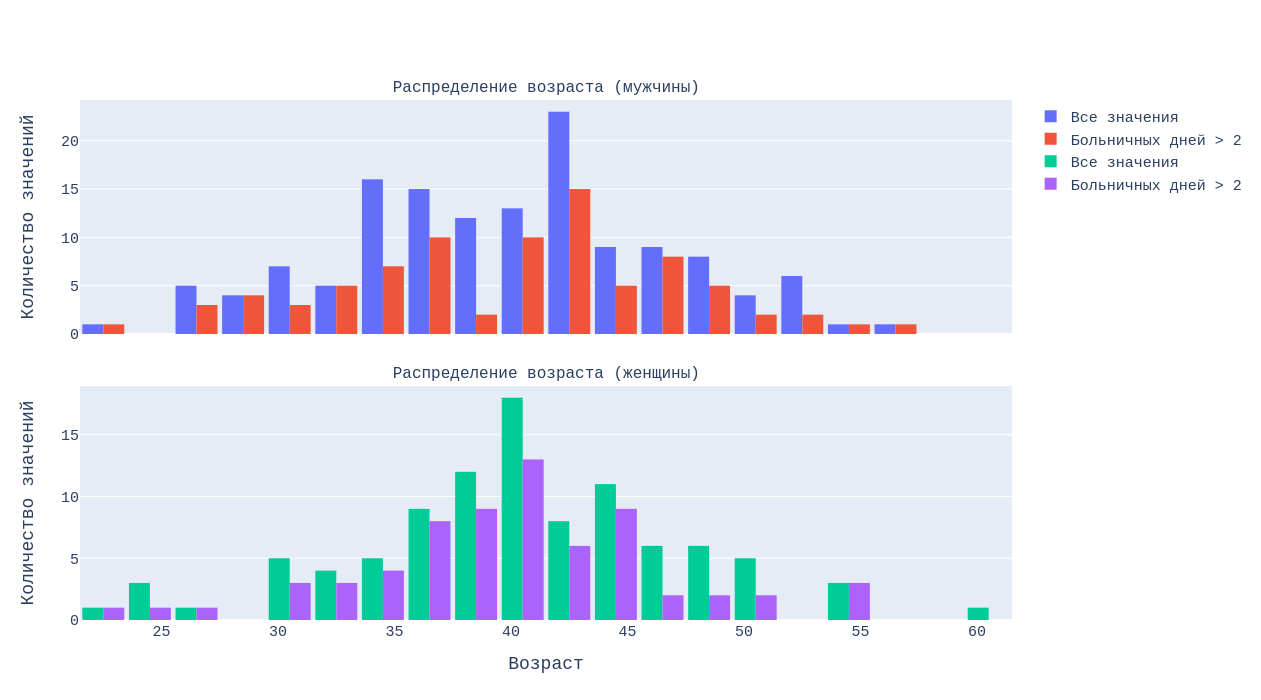

In [16]:
fig = make_subplots(
    rows=2,
    cols=1,
    shared_xaxes=True,
    subplot_titles=['Распределение возраста (мужчины)', 'Распределение возраста (женщины)'],
    vertical_spacing=0.1
)

fig.add_trace(
    go.Histogram(
        x=df.loc[df['Пол'] == 'М', 'Возраст'],
        name='Все значения'
    ),
    row=1, col=1
)

fig.add_trace(
    go.Histogram(
        x=df.loc[(df['Пол'] == 'М') & (df['work_days_>_2'] == 'Да'), 'Возраст'],
        name='Больничных дней > 2'
    ),
    row=1, col=1
)

fig.add_trace(
    go.Histogram(
        x=df.loc[df['Пол'] == 'Ж', 'Возраст'],
        name='Все значения'
    ),
    row=2, col=1
)

fig.add_trace(
    go.Histogram(
        x=df.loc[(df['Пол'] == 'Ж') & (df['work_days_>_2'] == 'Да'), 'Возраст'],
        name='Больничных дней > 2'
    ),
    row=2, col=1
)

fig.update_layout(
    yaxis1_title='Количество значений',
    yaxis2_title='Количество значений',
    xaxis2_title='Возраст',
    width=1200,
    height=700,
)
fig.show()

Воспользуемя two proportions ztest, он требует независимость двух пропорций. Воспользуемся таблицей сопряженности для проверки независимости. Возьмем тест независимости хи-квадрат

### Проверка на независимость

$H_0$: две группы независимы \\
$H_1$: две группы не являются независимыми

In [17]:
men_more = len(df.query('`Пол` == "М" and `Количество больничных дней` > 2'))
men_less = len(df.query('`Пол` == "М" and `Количество больничных дней` <= 2'))

women_more = len(df.query('`Пол` == "Ж" and `Количество больничных дней` > 2'))
women_less = len(df.query('`Пол` == "Ж" and `Количество больничных дней` <= 2')) 

contingency_table = pd.DataFrame(
    [[men_less, men_more], [women_less, women_more]],
    columns=['Количество больничных дней <= 2', 'Количество больничных дней > 2'],
    index=['М', 'Ж']
)
contingency_table

,Количество больничных дней <= 2,Количество больничных дней > 2
М,55,84
Ж,31,67


In [18]:
from scipy.stats import chi2_contingency


res = chi2_contingency(contingency_table)

if res.pvalue < 0.05:
    print('Отколняем нулевую гипотезу')
else:
    print('Не можем отклонить нулевую гипотезу')

Не можем отклонить нулевую гипотезу


### Тест

$p_1$ - пропорция **мужчин**, которые пропустили более 2 рабочих дней \\
$p_2$ - пропорция **женщин**, которые пропустили более 2 рабочих дней \\
$H_0: p_1 = p_2$ \\
$H_1: p_1 > p_2$

In [19]:
df_test_1 = df.query('`Количество больничных дней` > 2')
n_1, n_2 = df_test_1['Пол'].value_counts()[['М', 'Ж']]
n_obs_1, n_obs_2 = df['Пол'].value_counts()[['М', 'Ж']]

print(f'p_1 = {n_1}/{n_obs_1} = {n_1 / n_obs_1:.2f}, p_2 = {n_2}/{n_obs_2} = {n_2 / n_obs_2:.2f}')

p_1 = 84/139 = 0.60, p_2 = 67/98 = 0.68


In [20]:
from statsmodels.stats.proportion import proportions_ztest


alpha = 0.05
zstat, p_val = proportions_ztest([n_1, n_2], [n_obs_1, n_obs_2], alternative='larger')

if p_val < alpha:
    print('Отклоняем нулевую гипотезу')
else:
    print('Не можем отклонить нулевую гипотезу')

Не можем отклонить нулевую гипотезу


## Работники старше 35 лет (age) пропускают в течение года более 2 рабочих дней (work_days) по болезни значимо чаще своих более молодых коллег.

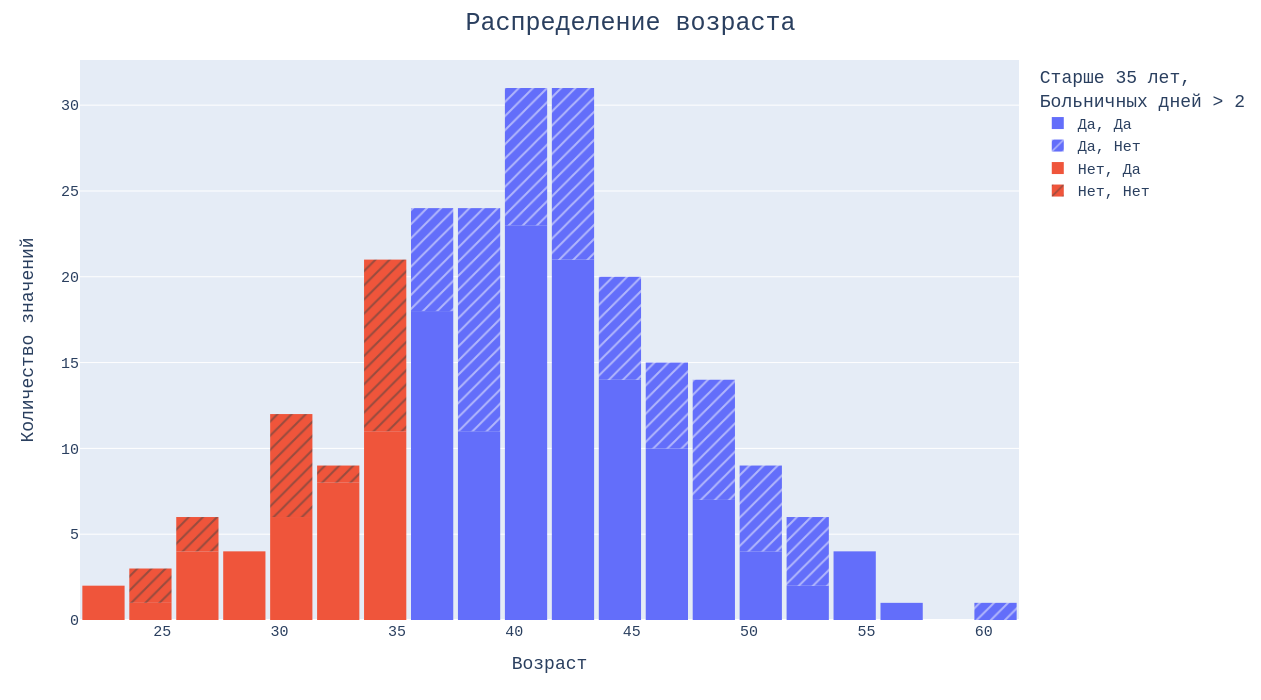

In [21]:
df['older_than_35'] = df['Возраст'].apply(lambda x: 'Да' if x > 35 else 'Нет')

fig = px.histogram(
    df,
    x='Возраст',
    color='older_than_35',
    pattern_shape='work_days_>_2'
)

fig.update_layout(
    title_text='Распределение возраста',
    legend_title_text='Старше 35 лет,<br>Больничных дней > 2',
    yaxis_title='Количество значений',
    width=1200,
    height=700
)
fig.show()

In [22]:
df['older_than_35'] = df['Возраст'].apply(lambda x: 'Да' if x > 35 else 'Нет')
df.loc[df['work_days_>_2'] == 'Да', 'older_than_35'].value_counts()

Да     115
Нет     36
Name: older_than_35, dtype: int64

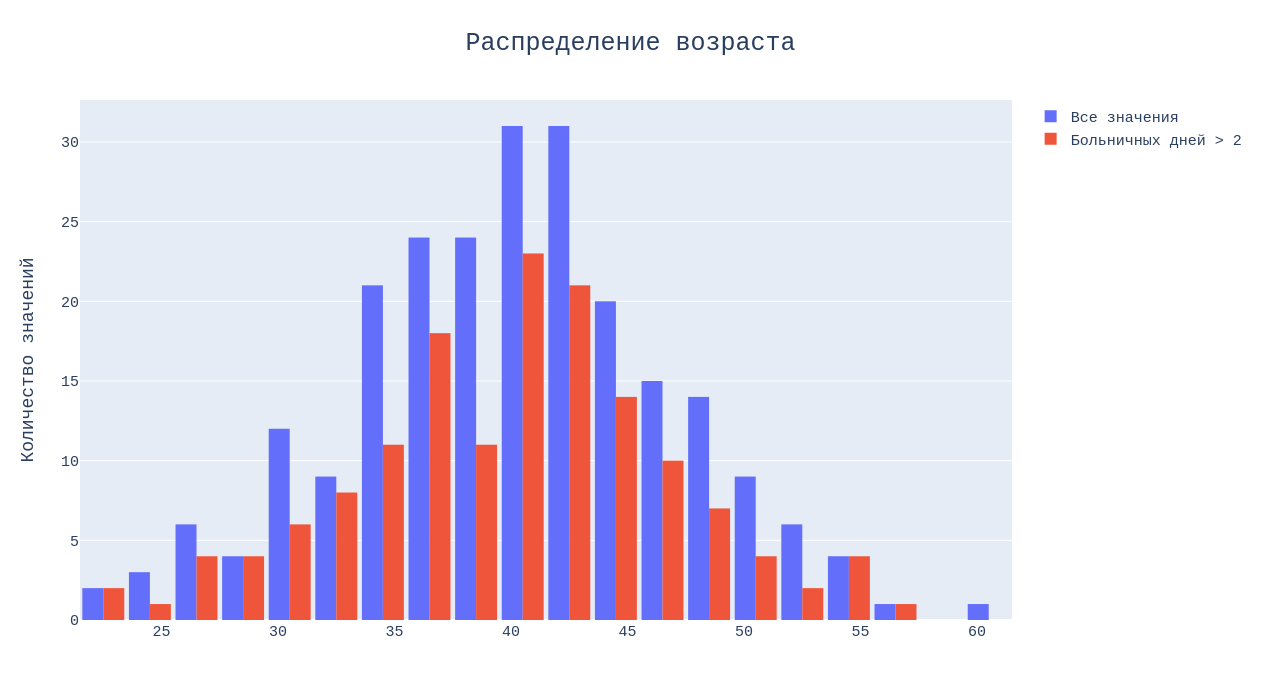

In [23]:
fig = go.Figure()

fig.add_trace(
    go.Histogram(
        x=df['Возраст'],
        name='Все значения'
    )
)

fig.add_trace(
    go.Histogram(
        x=df.loc[df['work_days_>_2'] == 'Да', 'Возраст'],
        name='Больничных дней > 2'
    )
)

fig.update_layout(
    title_text='Распределение возраста',
    yaxis_title='Количество значений',
    width=1200,
    height=700
)
fig.show()

### Проверка на независимость

$H_0$: две группы независимы \\
$H_1$: две группы не являются независимыми

In [24]:
young_more = len(df.query('`Возраст` < 35 and `Количество больничных дней` > 2'))
young_less = len(df.query('`Возраст` < 35 and `Количество больничных дней` <= 2'))

old_more = len(df.query('`Возраст` >= 35 and `Количество больничных дней` > 2'))
old_less = len(df.query('`Возраст` >= 35 and `Количество больничных дней` <= 2')) 

contingency_table = pd.DataFrame(
    [[young_less, young_more], [old_less, old_more]],
    columns=['Количество больничных дней <= 2', 'Количество больничных дней > 2'],
    index=['Возраст < 35', 'Возраст >= 35']
)
contingency_table

,Количество больничных дней <= 2,Количество больничных дней > 2
Возраст < 35,15,31
Возраст >= 35,71,120


In [25]:
from scipy.stats import chi2_contingency


res = chi2_contingency(contingency_table)

if res.pvalue < 0.05:
    print('Отколняем нулевую гипотезу')
else:
    print('Не можем отклонить нулевую гипотезу')

Не можем отклонить нулевую гипотезу


### Тест

Также воспользуемся two proportions ztest

$p_1$ - пропорция работников, **старше 35 лет**, которые пропустили более 2 рабочих дней \\
$p_2$ - пропорция работников, **не старше 35 лет**, которые пропустили более 2 рабочих дней \\
$H_0: p_1 = p_2$ \
$H_1: p_1 > p_2$

In [26]:
df_test_2 = df.query('`Количество больничных дней` > 2')['Возраст']
n_1, n_2 = np.sum(df_test_2 > 35), np.sum(df_test_2 <= 35)
n_obs_1, n_obs_2 = np.sum(df['Возраст'] > 35), np.sum(df['Возраст'] <= 35)

print(f'p_1 = {n_1}/{n_obs_1} = {n_1 / n_obs_1:.2f}, p_2 = {n_2}/{n_obs_2} = {n_2 / n_obs_2:.2f}')

p_1 = 115/180 = 0.64, p_2 = 36/57 = 0.63


Воспользуемся two proportions ztest

In [27]:
from statsmodels.stats.proportion import proportions_ztest


alpha = 0.05
zstat, p_val = proportions_ztest([n_1, n_2], [n_obs_1, n_obs_2], alternative='larger')

if p_val < alpha:
    print('Отклоняем нулевую гипотезу')
else:
    print('Не можем отклонить нулевую гипотезу')

Не можем отклонить нулевую гипотезу
